Arbol elemental con libreria  rpart

#Debe tener instaladas las librerias  data.table  ,  rpart   y rpart.plot

In [32]:
#cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")

In [33]:
#Aqui se debe poner la carpeta de SU computadora local
setwd("/Users/manuelvargas/Documents/ITBA-Maestria- Especialización en Ciencia de Datos/clases/Mineria de Datos/DATOS")  #Establezco el Working Directory

cargo los datos de 202009 que es donde voy a ENTRENAR el modelo

In [34]:
dtrain  <- fread("./paquete_premium_202011.csv")

genero el modelo,  aqui se construye el arbol

In [35]:
modelo  <- rpart("clase_ternaria ~ .",
                 data = dtrain,
                 xval=0,
                 cp=        -0.3,  #esto significa no limitar la complejidad de los splits
                 minsplit=  100,   #minima cantidad de registros para que se haga el split
                 minbucket=   1,   #tamaño minimo de una hoja
                 maxdepth=   15 )  #PRUEBO  una profundidad de 10

Ahora grafico el arbol, va a ser muy frondoso porque la profundidad es de 10

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


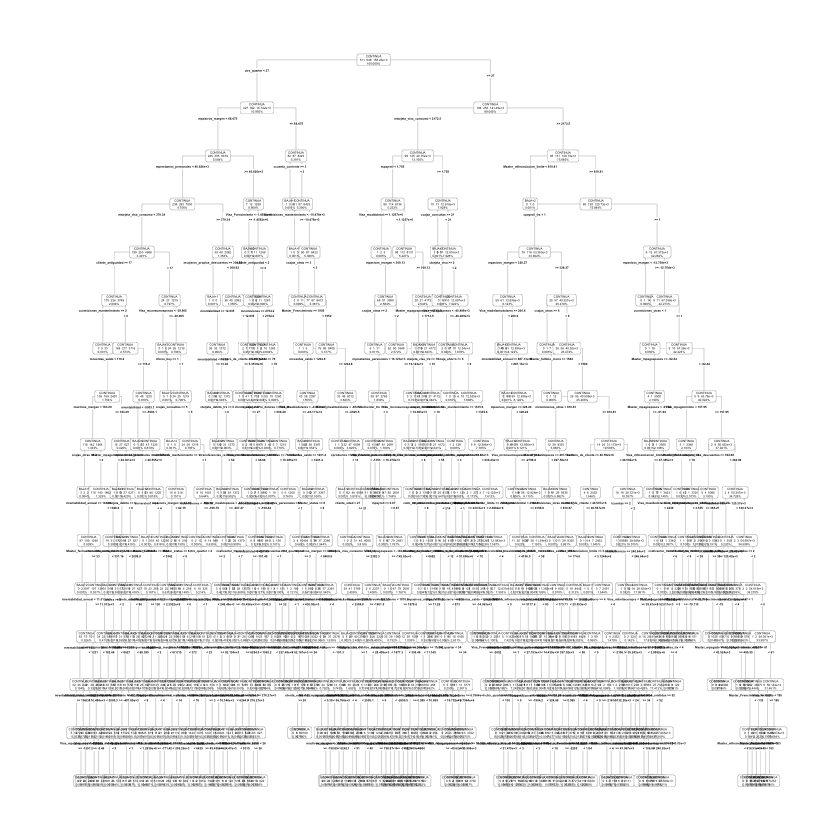

In [36]:
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0)

In [37]:
#Ahora aplico al modelo  a los datos de 202101  y genero la salida para kaggle

#cargo los datos de 202011, que es donde voy a APLICAR el modelo

In [38]:
dapply  <- fread("./paquete_premium_202101.csv")

In [39]:
prediccion  <- predict( modelo, dapply , type = "prob") #aplico el modelo

prediccion es una matriz con TRES columnas, llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"
cada columna es el vector de probabilidades 

agrego a dapply una columna nueva que es la probabilidad de BAJA+2

In [40]:
dapply[ , prob_baja2 := prediccion[, "BAJA+2"] ]

solo le envio estimulo a los registros con probabilidad de BAJA+2 mayor  a  1/60

In [41]:
dapply[ , Predicted  := as.numeric(prob_baja2 > 1/60) ]

genero un dataset con las dos columnas que me interesan

In [42]:
entrega  <- dapply[   , list(numero_de_cliente, Predicted) ] #genero la salida

#Finalmente genero el archivo para Kaggle

In [43]:
#creo la carpeta donde va el experimento

In [44]:
#dir.create( "./labo/exp/" ) 
#dir.create( "./labo/exp/KA2002" ) 

grabo el dataset

In [45]:
fwrite( entrega, 
        file= "./labo/exp/KA2002/K102_001-depth15.csv", 
        sep= "," )